# Import Libraries

In [218]:
import random
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import copy
import logging
import missingno
import operator
from collections import Counter
from category_encoders import TargetEncoder, BinaryEncoder
from imblearn.over_sampling import (
    SMOTE,
    RandomOverSampler,
    SVMSMOTE,
    BorderlineSMOTE,
    ADASYN,
    SMOTEN,
    SMOTENC
)
from imblearn.under_sampling import (
    TomekLinks, 
    RandomUnderSampler,
    EditedNearestNeighbours, 
    RepeatedEditedNearestNeighbours, 
    AllKNN, 
    CondensedNearestNeighbour, 
    ClusterCentroids, 
    NearMiss
)
from sklearn.model_selection import (
    LeaveOneOut,
    LeavePOut,
    RepeatedKFold,
    StratifiedKFold,
    TimeSeriesSplit,
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    learning_curve,
    KFold
)
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import (
    LabelEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    LabelBinarizer, 
    MultiLabelBinarizer,
    MaxAbsScaler,
    QuantileTransformer,
    PowerTransformer,
    Normalizer
)
from sklearn.feature_extraction import (
    DictVectorizer, 
    FeatureHasher
)
from sklearn.linear_model import (
    LogisticRegression,
    Ridge,
    Lasso,
    ElasticNet,
    BayesianRidge
)
from sklearn.feature_selection import (
    SelectKBest, 
    SelectFpr, 
    SelectFdr, 
    SelectFwe, 
    SelectPercentile, 
    GenericUnivariateSelect, 
    VarianceThreshold, 
    RFE, 
    RFECV, 
    SequentialFeatureSelector, 
    SelectFromModel, 
    f_regression, 
    chi2, 
    f_classif, 
    mutual_info_classif, 
    mutual_info_regression
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import (
    KNeighborsClassifier,
    NearestNeighbors
)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier
)
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    matthews_corrcoef,
    balanced_accuracy_score
)
from tpot import TPOTClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.decomposition import (
    PCA, 
    FactorAnalysis, 
    TruncatedSVD, 
    FastICA, 
    KernelPCA
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from tensorflow.keras.layers import Input, Dense  # type: ignore
from tensorflow.keras.models import Model  # type: ignore
from scipy.stats import uniform, randint
from fast_ml.model_development import train_valid_test_split
from typing import (
    Any,
    Literal,
    Union,
    List,
    Optional,
    Dict,
    Tuple
)
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
logging.basicConfig(level=logging.INFO)

# Call_def

In [219]:
from ML_def import (
    read_data,
    columns_info,
    not_useful_columns,
    convert_to_numeric,
    target_last_col,
    remove_missing_rows,
    fill_missing_values_dataFrame,
    fill_missing_values_column,
    check_outliers,
    box_plot_all_columns,
    check_balance_classification,
    classification_rate_by_group,
    over_under_sampling_classification,
    plot_groupby,
    plot_pivot,
    plot_pivot_2,
    plot_groupby_and_pivot,
    calculate_correlation,
    Heatmap_Correlation,
    create_custom_scatter_plot,
    plot_histograms,
    encode_column,
    get_x_y_TVT,
    validate_test_data_categorical_columns,
    get_x_y_TVT_shape,
    feature_selection,
    dimensionality_reduction,
    scale_data,
    get_cross_validator,
    grid_search_classifier,
    random_search_classifier,
    get_classifier,
    get_x_y,
    plot_feature_importance,
    Check_Overfitting_Classification,
    plot_confusion_matrix,
    evaluate_model_Classification,
)

# call_visualization_def

In [220]:
from ML_visualization import (
    plot_line,
    plot_line_matplotlib,
    plot_line_all_column,
    plot_line_seaborn,
    plot_line_plotly,
    scatter_plot_matplotlib,
    scatter_plot_seaborn,
    scatter_plot_plotly,
    reg_plot,
    resid_plot,
    bar_plot_matplotlib,
    bar_plot_seaborn,
    bar_plot_all_column,
    bar_plot_plotly,
    multiple_bar_plot_matplotlib,
    multiple_bar_plots_seaborn,
    multiple_bar_plots_plotly,
    cat_plot,
    cat_plot_all_column,
    facet_grid_seaborn,
    pie_chart,
    pie_chart_plotly,
    plot_single_histogram_matplotlib,
    plot_histograms_matplotlib,
    plot_single_histogram_seaborn,
    plot_histograms_seaborn,
    plot_histograms_plotly,
    kde_plot,
    kde_plot_all_column,
    count_plot,
    count_plot_all_column,
    count_plot_plotly,
    box_plot_matplotlib,
    box_plot_seaborn,
    box_plot_plotly,
    box_plot_all_column,
    heatmap_plot,
    heatmap_plot_plotly,
    pair_plot,
    pair_plot_plotly,
    violin_plot,
    violin_plot_plotly,
    plot_violin_all_column,
    joint_plot,
    plot_parallel_coordinates,
    plot_contour,
    plot_tricontourf,
    custom_plot
)

# Read_Data

In [221]:
df = read_data(r'Churn_Modelling.csv')
true_original_df = copy.deepcopy(df)
df.head()

the DataFrame dont have any duplicates row
Data read successfully from Churn_Modelling.csv


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [222]:
# Make the target is last column
df = target_last_col(df,'Exited')

# Get Information of Data

In [223]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [224]:
columns_info(df)

,names,dtypes,unique,n_unique,number_of_rows,number_of_null
0,RowNumber,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",10000,10000,0
1,CustomerId,int64,"[15634602, 15647311, 15619304, 15701354, 15737...",10000,10000,0
2,Surname,object,"[Hargrave, Hill, Onio, Boni, Mitchell, Chu, Ba...",2932,10000,0
3,CreditScore,int64,"[619, 608, 502, 699, 850, 645, 822, 376, 501, ...",460,10000,0
4,Geography,object,"[France, Spain, Germany]",3,10000,0
5,Gender,object,"[Female, Male]",2,10000,0
6,Age,int64,"[42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 2...",70,10000,0
7,Tenure,int64,"[2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]",11,10000,0
8,Balance,float64,"[0.0, 83807.86, 159660.8, 125510.82, 113755.78...",6382,10000,0
9,NumOfProducts,int64,"[1, 3, 2, 4]",4,10000,0


In [225]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

# drop not useful columns

#### list of columns

In [226]:
not_useful_columns_name = ['RowNumber','CustomerId','Surname']
not_useful_columns(df=df, column_name=not_useful_columns_name)

#### single column

In [227]:
# not_useful_columns(df=df, column_name='')

# change the dtype of the column from object to numeric

#### list of columns

In [228]:
# convert_to_numeric_columns_name = ['']
# convert_to_numeric(df=df, column_name=convert_to_numeric_columns_name)

#### single column

In [229]:
# convert_to_numeric(df=df, column_name='Total Charges')

# take copy for Visualization

In [230]:
original_df = copy.deepcopy(df)
original_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Describe numerical column and his information

In [231]:
df.select_dtypes(include=['int64', 'float64']).columns.tolist()

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [232]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Describe object column and his information

In [233]:
df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

['Geography', 'Gender']

In [234]:
df.describe(include=['object'])

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


# Data Encoding columns with 2 unique values

In [235]:
object_columns = df.select_dtypes(include=['object']).columns
columns_with_2_unique_values = [col for col in object_columns if len(df[col].value_counts()) == 2]

df = encode_column(df, columns = columns_with_2_unique_values, method='binary')

In [236]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


# check columns have nulls

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 859.5+ KB


In [238]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Identify columns with missing values

In [239]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 []


# Removing Rows with Missing Values

#### list of columns

In [240]:
# remove_rows_column_name = ['Total Charges', '', '']
# remove_missing_rows(df=df, column_name=remove_rows_column_name)

#### single column

In [241]:
# remove_missing_rows(df=df, column_name='Total Charges')

#### from all DataFrame

In [242]:
# remove_missing_rows(df=df)

## check columns with missing values

In [243]:
# # Identify columns with missing values
# missing_columns = df.columns[df.isnull().any()].tolist()
# print("Columns with missing values: \n" , missing_columns)

# Filling Missing Values

### Filling Missing Values for all DataFrame

In [244]:
# df = fill_missing_values_dataFrame(df, model='KNNImputer', n_neighbors=3)

### Filling Missing Values for column

#### list of columns

In [245]:
# fill_missing_columns = ['Total Charges', '', '']
# df = fill_missing_values_column(df, columns=fill_missing_columns, model='KNNImputer', n_neighbors=3)

#### single column

In [246]:
# df = fill_missing_values_column(df, columns='', model='KNNImputer', n_neighbors=3)

### check columns with missing values

In [247]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 []


# check outliers

## check outliers (numbers)

In [248]:
outliers_df = check_outliers(df)

CreditScore           0
Gender                0
Age                   0
Tenure                0
Balance            6383
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary    9924
Exited                0
dtype: int64


## check outliers (plots)

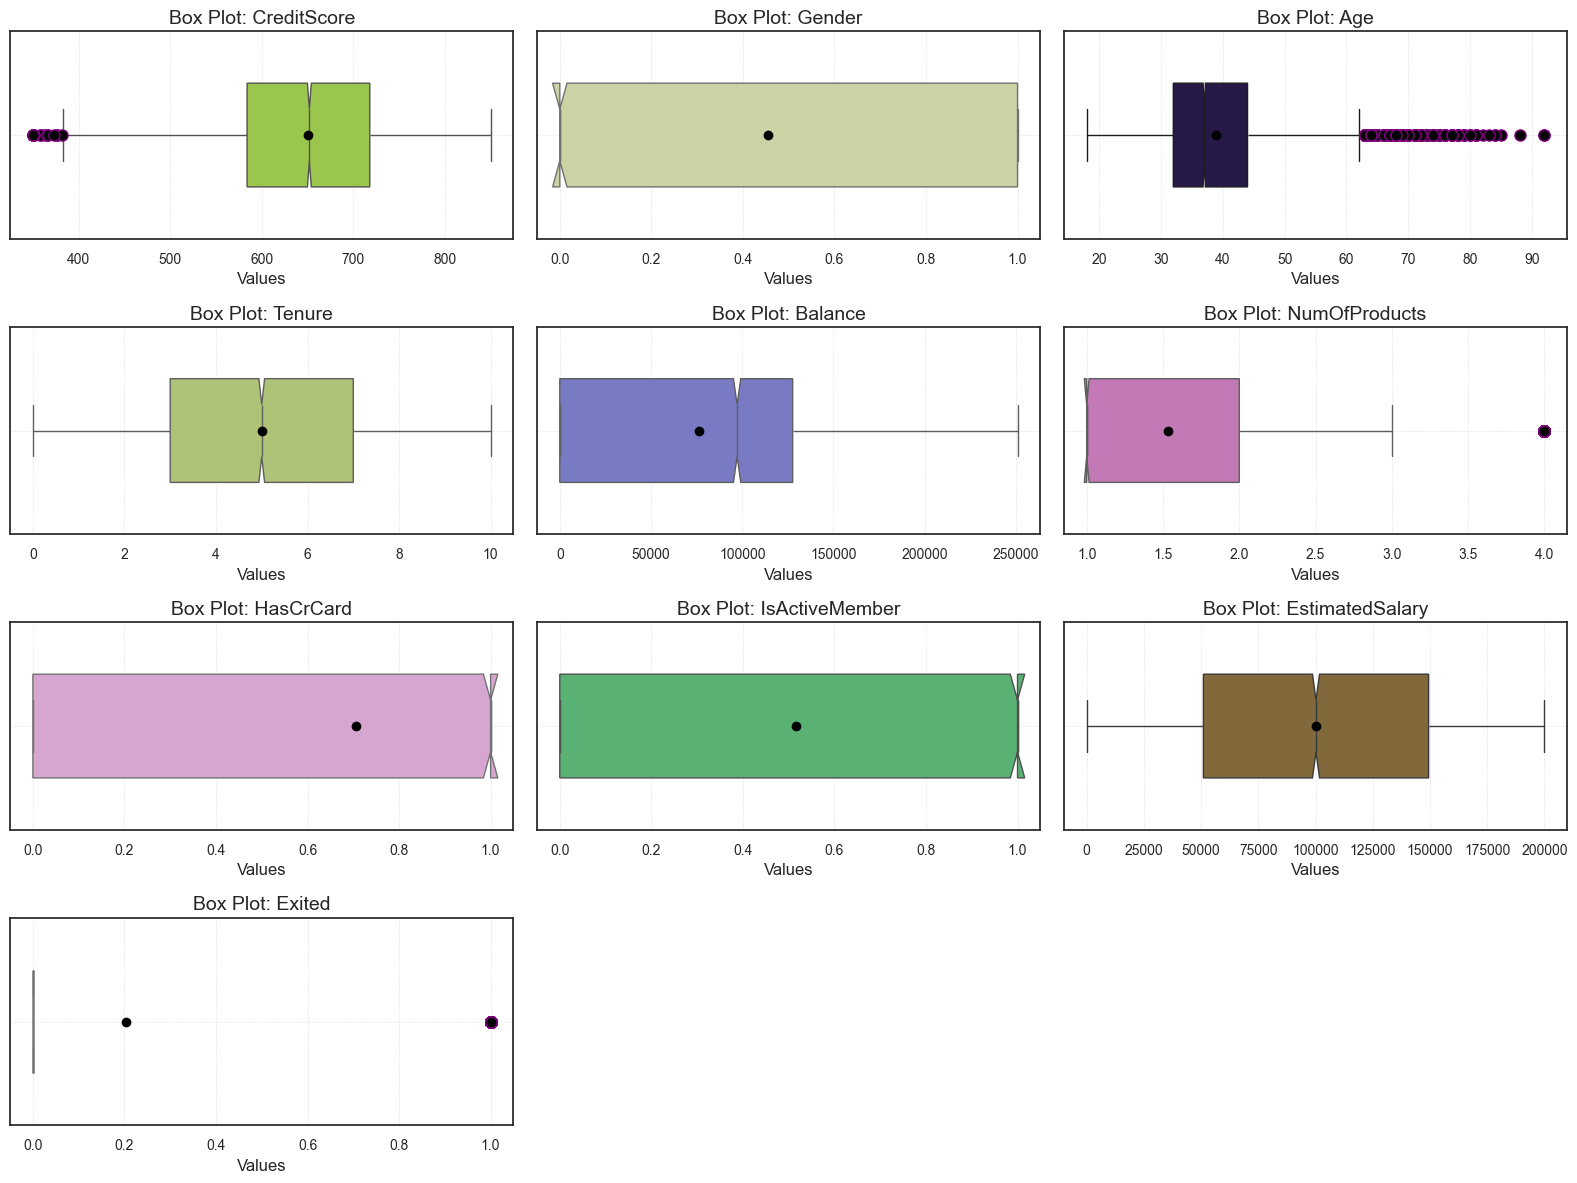

In [249]:
box_plot_all_columns(df, subplot_row = 3)

# Check the unbalance data

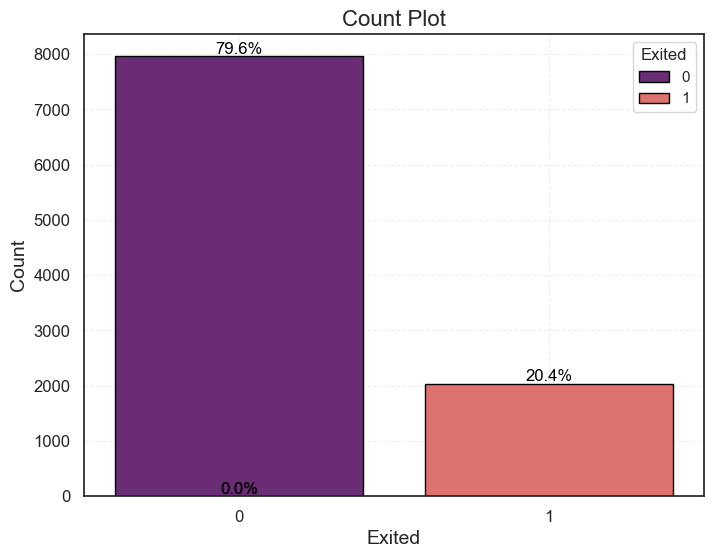

,count
name,
0,7963
1,2037


In [250]:
check_balance_classification(df,column_plot='Exited')

# Visualization

## info from the data

In [251]:
age_Exited_rates = classification_rate_by_group(true_original_df, 'Age', 'Exited', 'CustomerId', positive_class=1, threshold=4)

The classification rate of 54-71 in Age_range: 45.23%

The classification rate of 36-53 in Age_range: 26.57%

The classification rate of 18-35 in Age_range: 8.36%

The classification rate of 72-89 in Age_range: 3.85%

The classification rate of 90-92 in Age_range: 0.00%



In [252]:
NumOfProducts_Exited_rates = classification_rate_by_group(true_original_df, 'NumOfProducts', 'Exited', 'CustomerId', positive_class=1)

The classification rate of 1 in NumOfProducts: 27.71%

The classification rate of 3 in NumOfProducts: 82.71%

The classification rate of 2 in NumOfProducts: 7.58%

The classification rate of 4 in NumOfProducts: 100.00%



In [253]:
Geography_Exited_rates = classification_rate_by_group(true_original_df, 'Geography', 'Exited', 'CustomerId', positive_class=1)
Geography_Exited_rates

The classification rate of France in Geography: 16.15%

The classification rate of Spain in Geography: 16.67%

The classification rate of Germany in Geography: 32.44%



,name,values
0,Germany,0.324432
1,Spain,0.166734
2,France,0.161548


In [254]:
Tenure_Exited_rates = classification_rate_by_group(true_original_df, 'Tenure', 'Exited', 'CustomerId', positive_class=1, threshold=5)
Tenure_Exited_rates

The classification rate of 0-1 in Tenure_range: 22.58%

The classification rate of 4-5 in Tenure_range: 20.59%

The classification rate of 8-10 in Tenure_range: 20.45%

The classification rate of 2-3 in Tenure_range: 20.13%

The classification rate of 6-7 in Tenure_range: 18.70%



,name,values
0,0-1,0.225829
1,4-5,0.205897
2,8-10,0.204482
3,2-3,0.201264
4,6-7,0.186967


## chart

In [255]:
PaymentMethod_name = df['Geography'].value_counts().index.to_list()
PaymentMethod_values = df['Geography'].value_counts().values.tolist()
# pie_chart(labels=PaymentMethod_name, sizes=PaymentMethod_values, title="Payment Methods")
pie_chart_plotly(labels=PaymentMethod_name, sizes=PaymentMethod_values, title="Geography")


In [256]:
InternetService_name = df['NumOfProducts'].value_counts().index.to_list()
InternetService_values = df['NumOfProducts'].value_counts().values.tolist()
# pie_chart(labels=InternetService_name, sizes=InternetService_values, title="Payment Methods")
pie_chart_plotly(labels=InternetService_name, sizes=InternetService_values, title="Num of Products")

In [257]:
Contract_name = original_df['IsActiveMember'].value_counts().index.to_list()
Contract_values = original_df['IsActiveMember'].value_counts().values.tolist()
# pie_chart(labels=Contract_name, sizes=Contract_values, title="Payment Methods")
pie_chart_plotly(labels=Contract_name, sizes=Contract_values, title="Is Active Member")

## Multiple bar

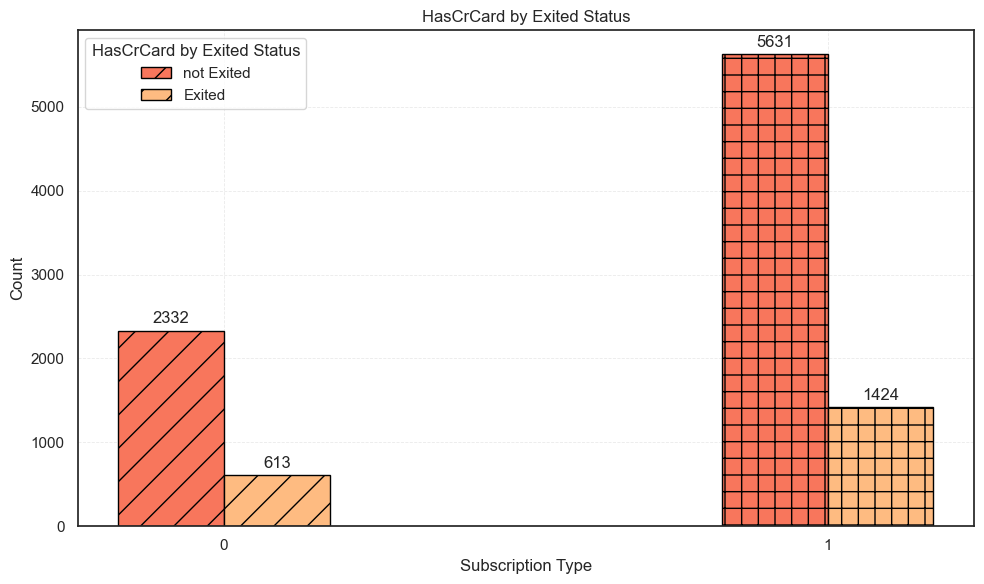

In [258]:
grouped_data = original_df.groupby(['HasCrCard', 'Exited']).size().unstack(fill_value=0)

categories = grouped_data.index.tolist()
datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
labels = ['not Exited', 'Exited']

multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='HasCrCard by Exited Status', xlabel='Subscription Type', ylabel='Count')

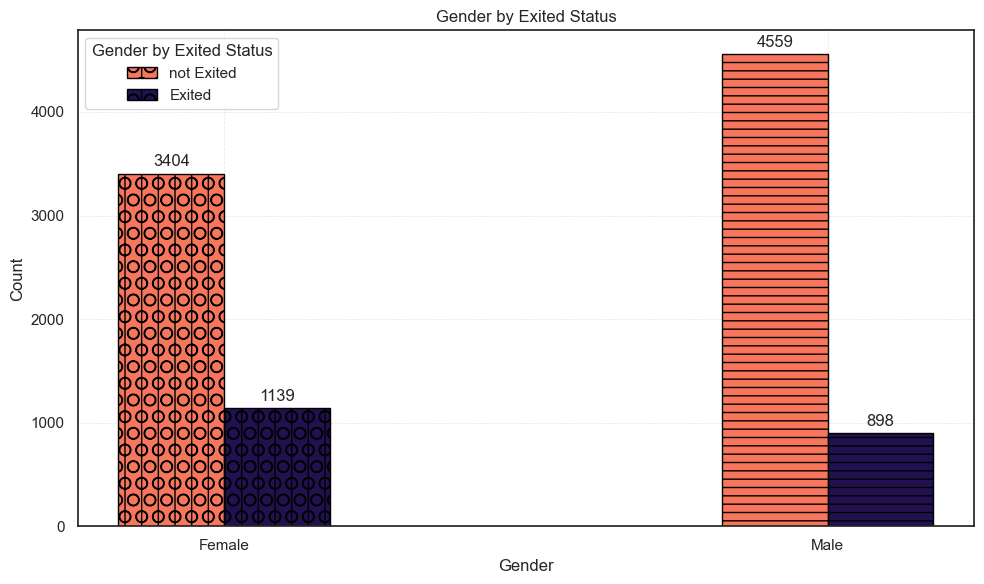

In [259]:
grouped_data = original_df.groupby(['Gender', 'Exited']).size().unstack(fill_value=0)

categories = grouped_data.index.tolist()
datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
labels = ['not Exited', 'Exited']

multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='Gender by Exited Status', xlabel='Gender', ylabel='Count')

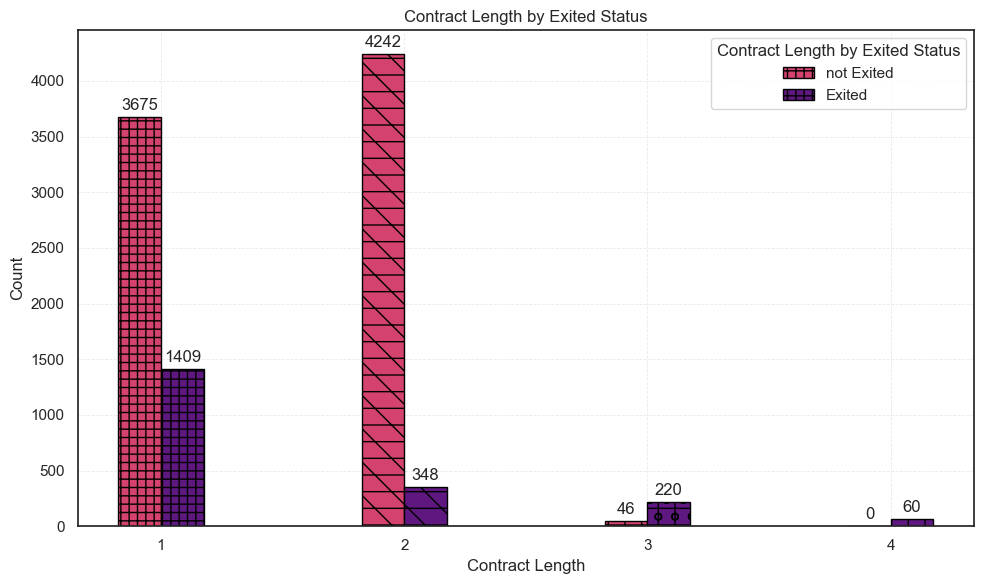

In [260]:
grouped_data = original_df.groupby(['NumOfProducts', 'Exited']).size().unstack(fill_value=0)

categories = grouped_data.index.tolist()
datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
labels = ['not Exited', 'Exited']

multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='Contract Length by Exited Status', xlabel='Contract Length', ylabel='Count')

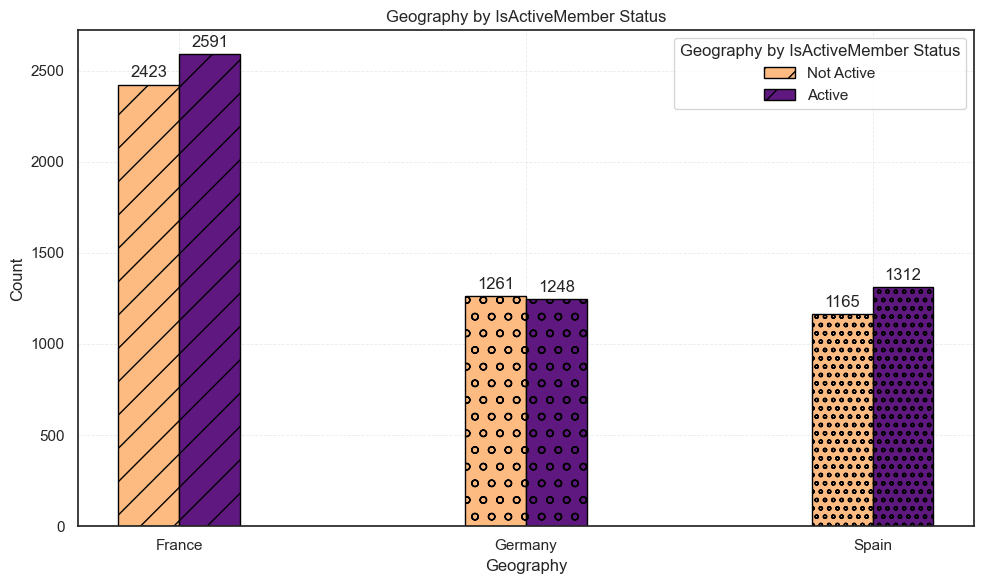

In [261]:
grouped_data = original_df.groupby(['Geography', 'IsActiveMember']).size().unstack(fill_value=0)

categories = grouped_data.index.tolist()
datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
labels = ['Not Active','Active']

multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='Geography by IsActiveMember Status', xlabel='Geography', ylabel='Count')

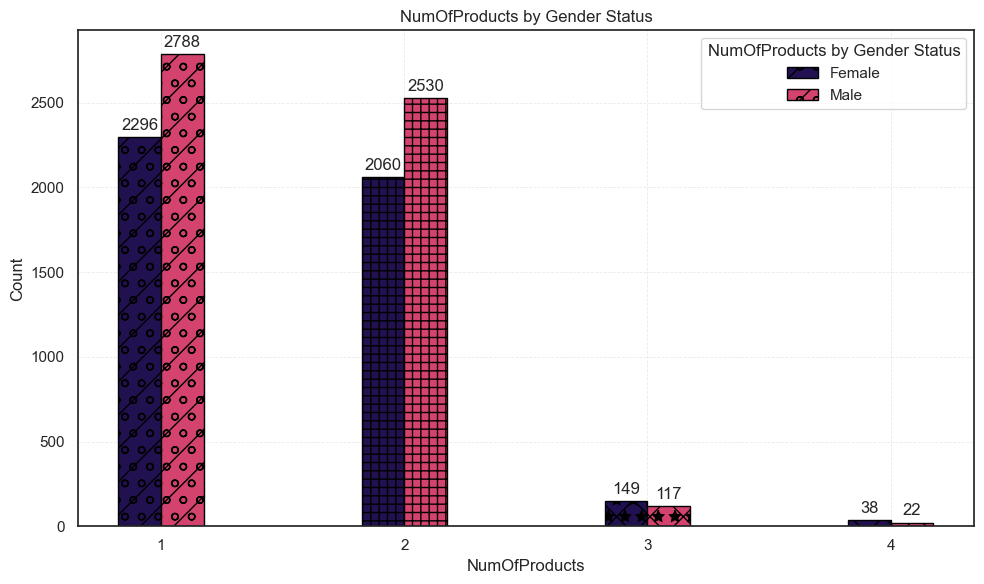

In [262]:
grouped_data = original_df.groupby(['NumOfProducts', 'Gender']).size().unstack(fill_value=0)

categories = grouped_data.index.tolist()
datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
labels = ['Female', 'Male']

multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='NumOfProducts by Gender Status', xlabel='NumOfProducts', ylabel='Count')

## Bar

In [263]:
column_counts = original_df['Tenure'].value_counts().reset_index()
column_counts.columns = ['tenure', 'value']

bar_plot_plotly(df=column_counts, x='tenure', y='value', hue='value')

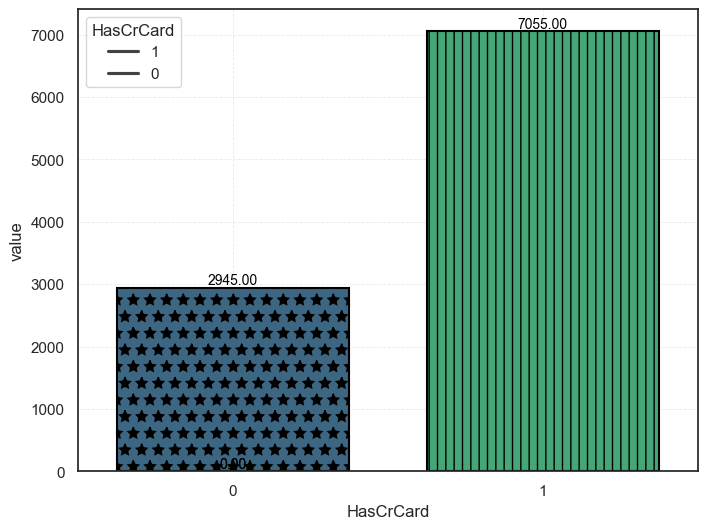

In [264]:
column_counts = original_df['HasCrCard'].value_counts().reset_index()
column_counts.columns = ['HasCrCard', 'value']

bar_plot_seaborn(df=column_counts, x='HasCrCard', y='value',palette='viridis')

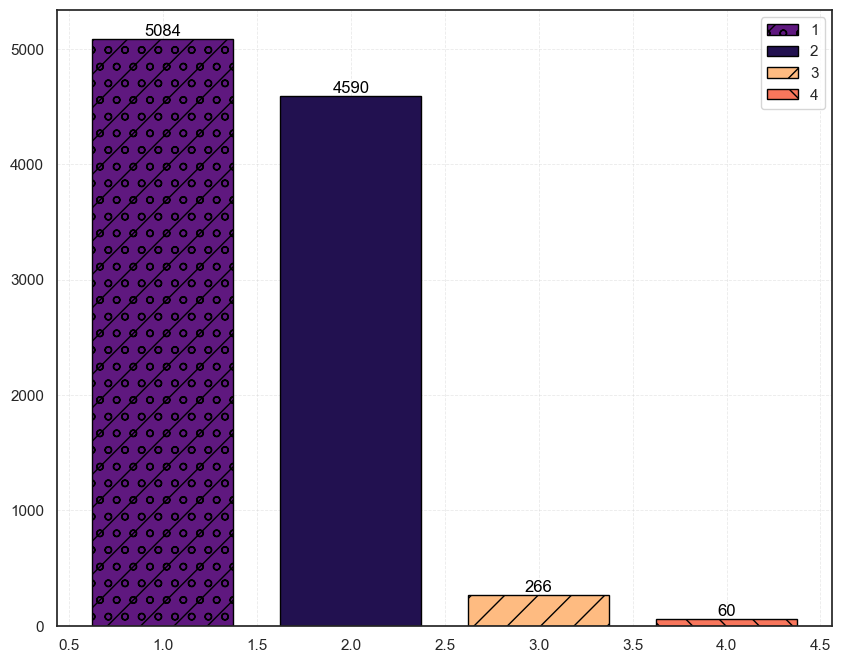

In [265]:
column_counts = original_df['NumOfProducts'].value_counts().reset_index()
column_counts.columns = ['NumOfProducts', 'value']

bar_plot_matplotlib(column_counts['NumOfProducts'], column_counts['value'],x_rotation=0)

## count plot

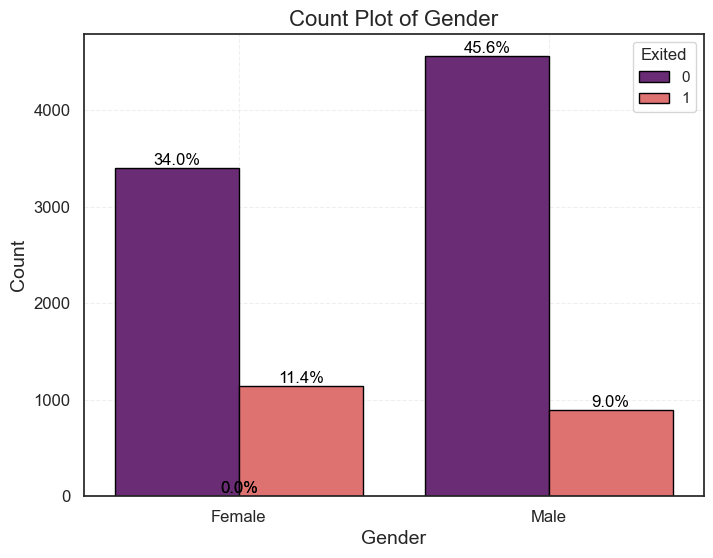

<Axes: title={'center': 'Count Plot of Gender'}, xlabel='Gender', ylabel='Count'>

In [266]:
count_plot(df=original_df , x='Gender' , hue='Exited')

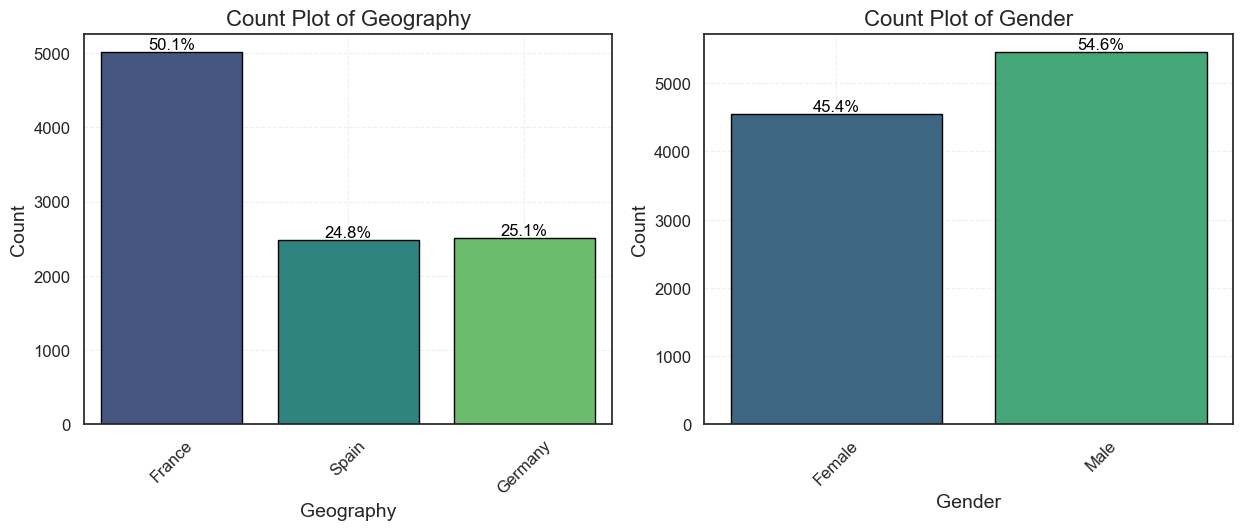

In [267]:
categorical_features=original_df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
count_plot_all_column(categorical_features, original_df, vision='x', num_of_column=4)

## Violin

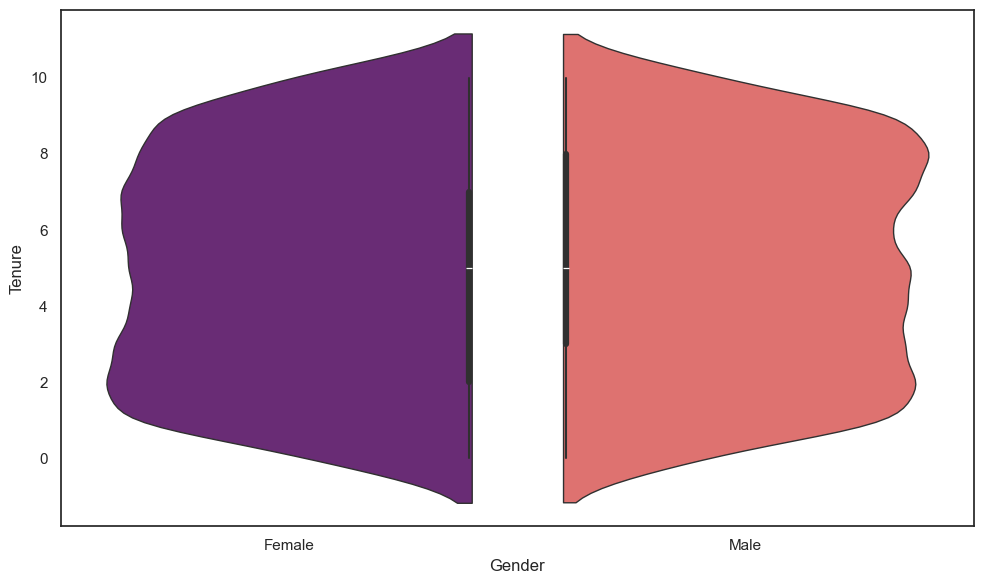

In [268]:
violin_plot(data=original_df, x='Gender', y='Tenure', hue='Gender',split=True) #catagorical column in x and numircal in y

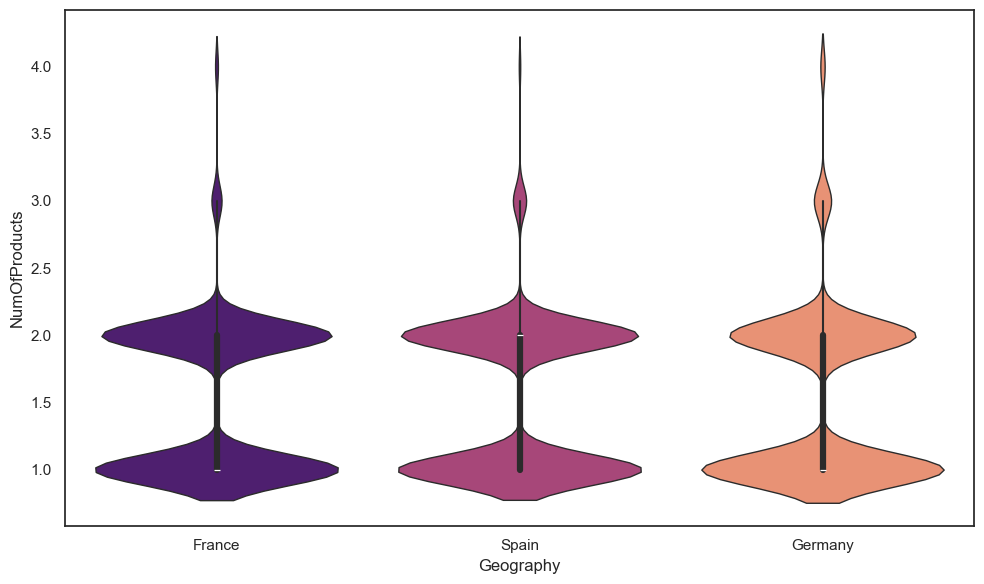

In [269]:
violin_plot(data=original_df, x='Geography', y='NumOfProducts', hue='Geography') #catagorical column in x and numircal in y

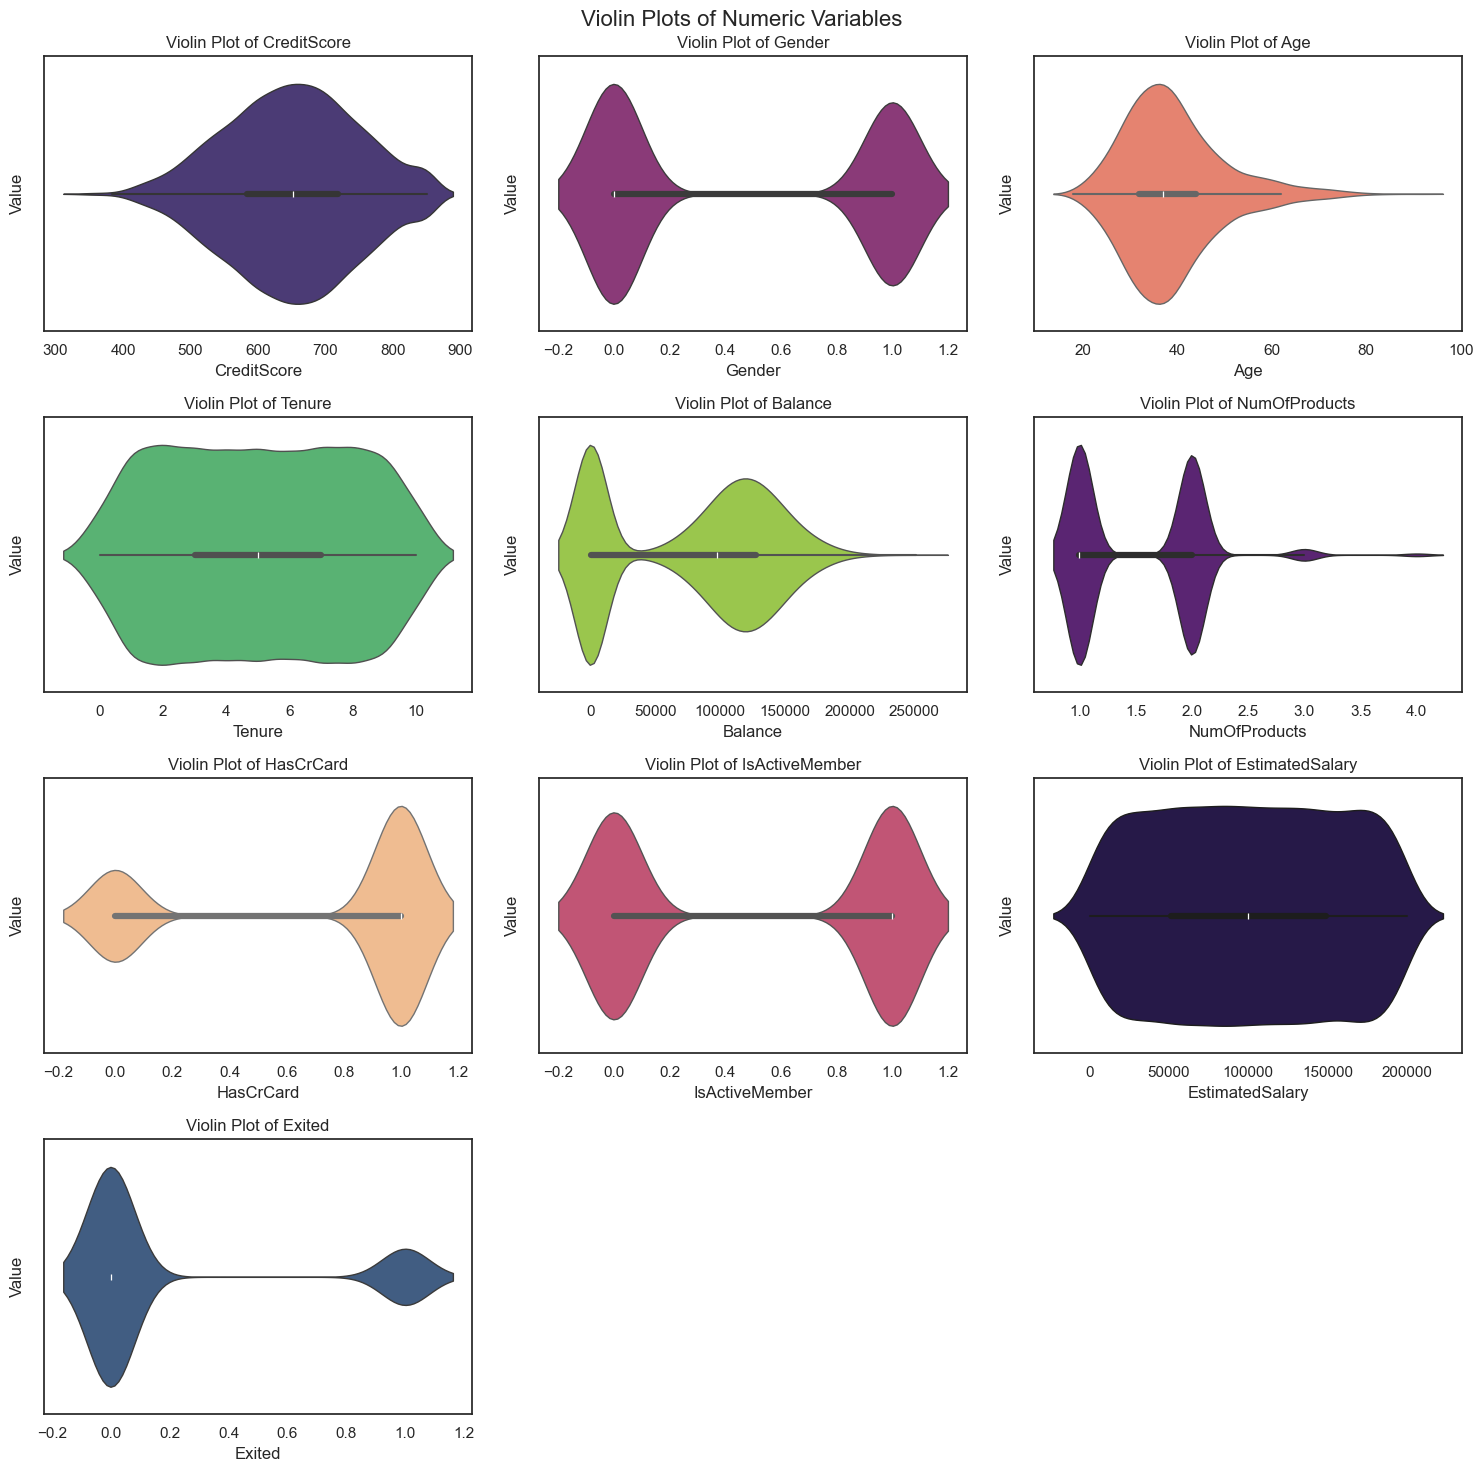

In [270]:
plot_violin_all_column(df)

## Histogram

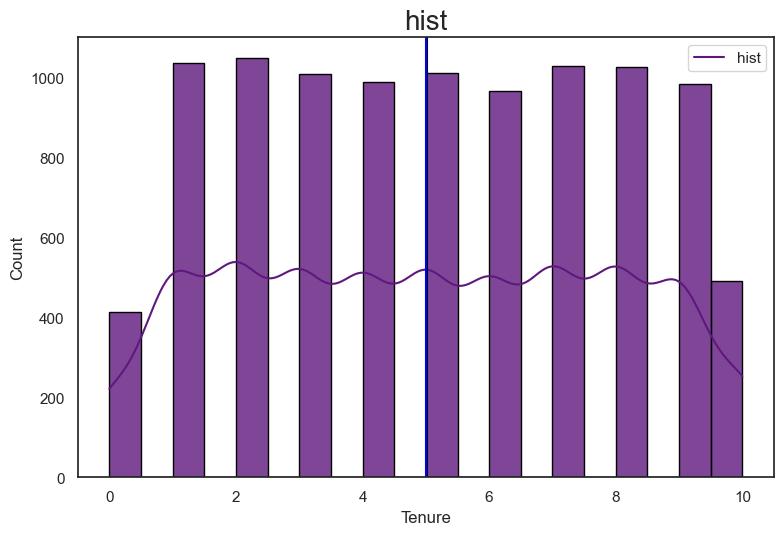

In [271]:
plot_single_histogram_seaborn(original_df,x='Tenure', bins=20, palette='magma', show=False)
plt.axvline(np.mean(original_df["Tenure"]) , color = "black" , label ="The Mean of the tenure")
plt.axvline(np.median(original_df["Tenure"]) , color = "blue" , label ="The Median of the tenure")
plt.show()

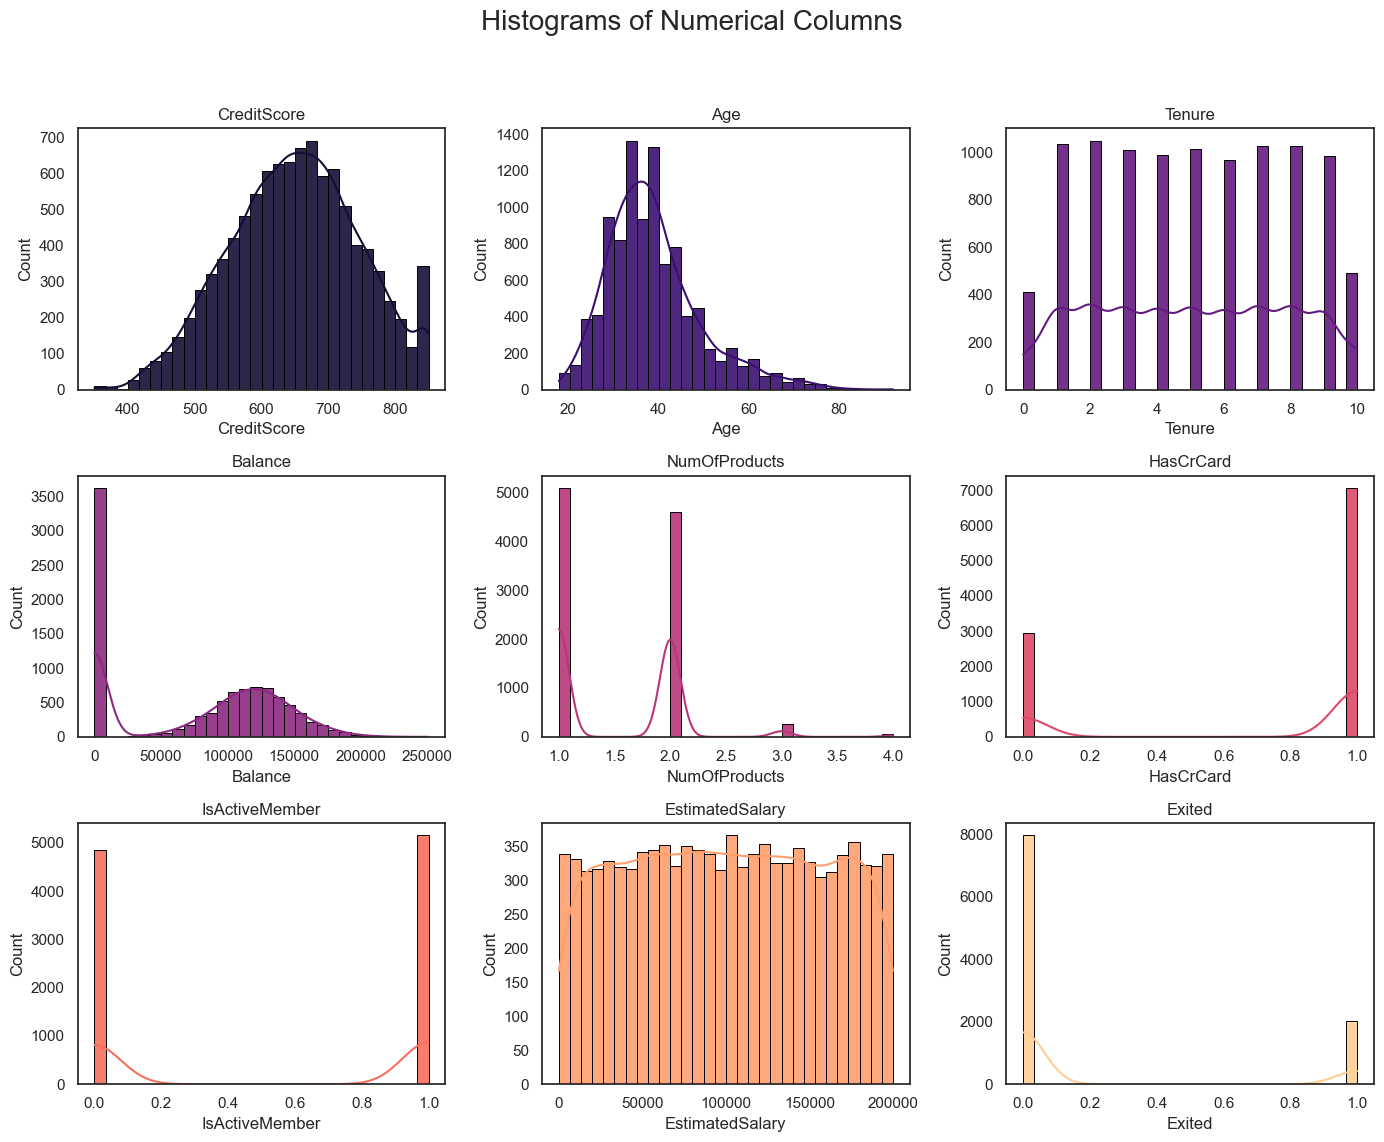

In [272]:
plot_histograms(original_df,column=None, bins=30)

# Correlation Coefficient

## Calculate Correlation

In [273]:
calculate_correlation(df, outcome_column='Exited',num_results=5)

Calculating Pearson correlation coefficients for numeric columns against the outcome column: {outcome_column}
Top 5 results:
         Variable  Pearson Coefficient        P-Value
2             Age             0.285323  1.239931e-186
7  IsActiveMember            -0.156128   1.348269e-55
4         Balance             0.118533   1.275563e-32
1          Gender             0.106512   1.258505e-26
5   NumOfProducts            -0.047820   1.717333e-06

Age
The Pearson Correlation Coefficient for Age is 0.2853 with a P-value of P = 1.24e-186

IsActiveMember
The Pearson Correlation Coefficient for IsActiveMember is -0.1561 with a P-value of P = 1.348e-55

Balance
The Pearson Correlation Coefficient for Balance is 0.1185 with a P-value of P = 1.276e-32

Gender
The Pearson Correlation Coefficient for Gender is 0.1065 with a P-value of P = 1.259e-26

NumOfProducts
The Pearson Correlation Coefficient for NumOfProducts is -0.0478 with a P-value of P = 1.717e-06


,Variable,Pearson Coefficient,P-Value
2,Age,0.285323,1.239931e-186
7,IsActiveMember,-0.156128,1.348269e-55
4,Balance,0.118533,1.275563e-32
1,Gender,0.106512,1.258505e-26
5,NumOfProducts,-0.047820,1.717333e-06


## Visualize Correlation with Bars

In [326]:
df_corr = df.corr()['Exited'].sort_values(ascending = False)
df_corr_index = df_corr.index.to_list()
df_corr_values = df_corr.values.tolist()
df_corr = pd.DataFrame({'name': df_corr_index, 'values':df_corr_values})
bar_plot_plotly(df=df_corr, x='name', y='values',hue='values', width=1500, height=650)

## Visualize Correlation with Heatmap

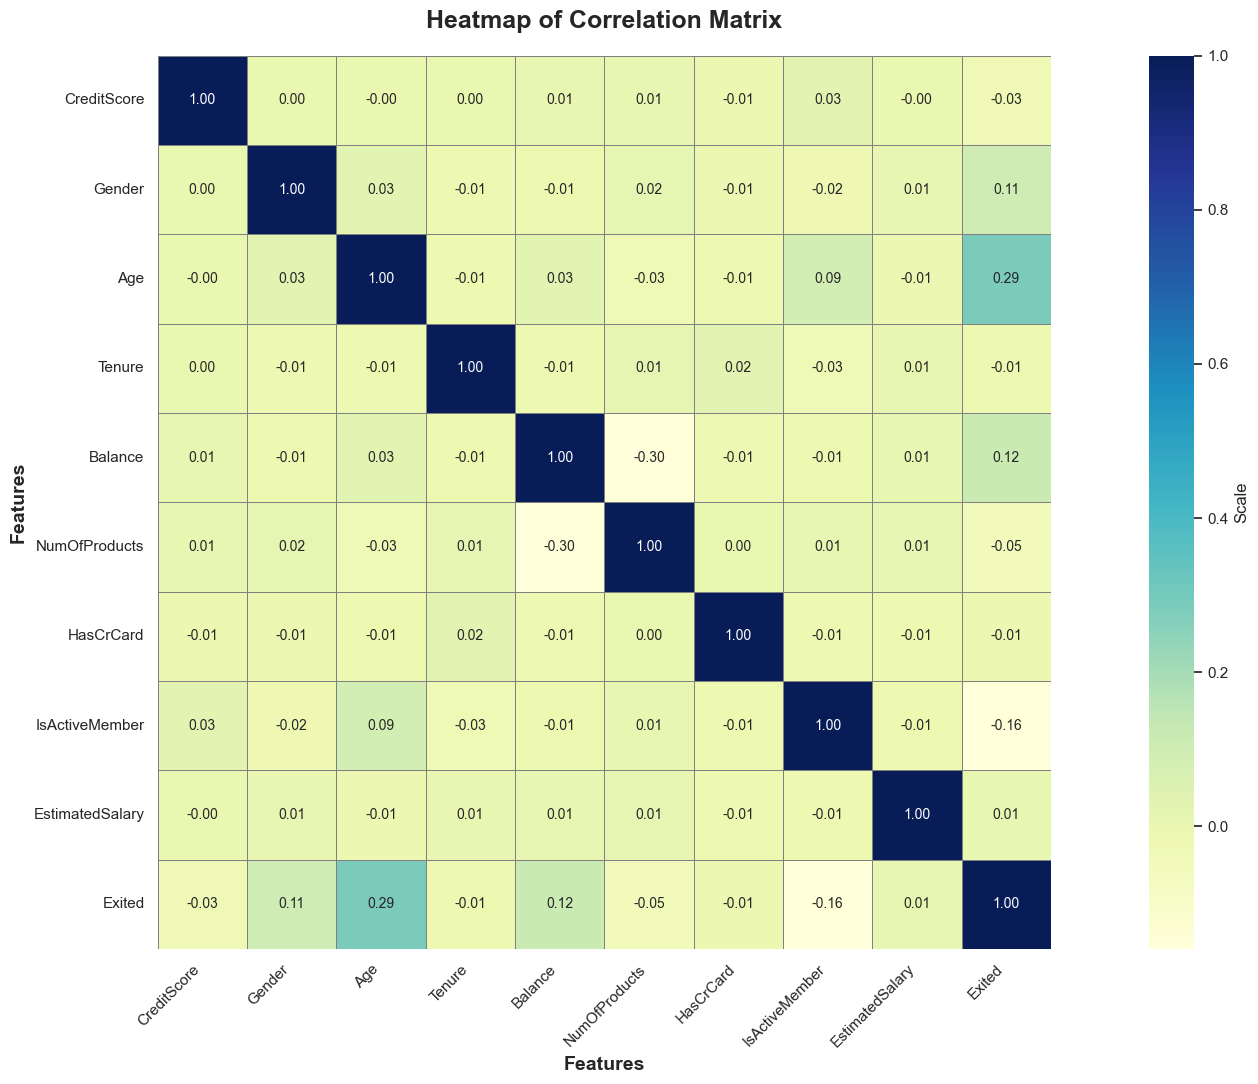

In [275]:
correlations = Heatmap_Correlation(df, mask=-1)

# Data Encoding

In [276]:
df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

['Geography']

In [277]:
column = ['Geography']

df = encode_column(df, columns = 'Geography', method='get_dummies')

# df = encode_column(df, columns = '', method= 'label')

# df = encode_column(df, columns = '', method='target',target="")

# ordinal_categories = df['Subscription Type'].value_counts().index.to_list()
# df = encode_column(df, columns = 'Subscription Type', method= 'ordinal', ordinal_categories=['Basic', 'Standard', 'Premium'])

df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

[]

In [278]:
len(df.columns)

12

## Make the target is last column

In [279]:
df = target_last_col(df,'Exited')
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Exited
0,619,1,42,2,0.00,1,1,1,101348.88,0.0,0.0,1
1,608,1,41,1,83807.86,1,0,1,112542.58,0.0,1.0,0
2,502,1,42,8,159660.80,3,1,0,113931.57,0.0,0.0,1
3,699,1,39,1,0.00,2,0,0,93826.63,0.0,0.0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0.0,1.0,0


# Repair unbalanced data by using oversampling and undersampling.

In [280]:
x, y = get_x_y(df, target='Exited')

In [281]:
df, x, y = over_under_sampling_classification(x, y, over_sampling_strategy=0.55, n_jobs=1)

Starting over-sampling and/or under-sampling process.
Initial class distribution: Counter({0: 7963, 1: 2037})

use SVMSMOTE model for oversampling
Applying SVMSMOTE with strategy 0.55
after oversampling class distribution: Counter({0: 7963, 1: 4379})

use TomekLinks model for undersampling
Applying TomekLinks under-sampling.
after undersampling class distribution: Counter({0: 7070, 1: 4379})

Final class distribution: Counter({0: 7070, 1: 4379})
Over-sampling and/or under-sampling process completed.


### Check the unbalance data after repair 

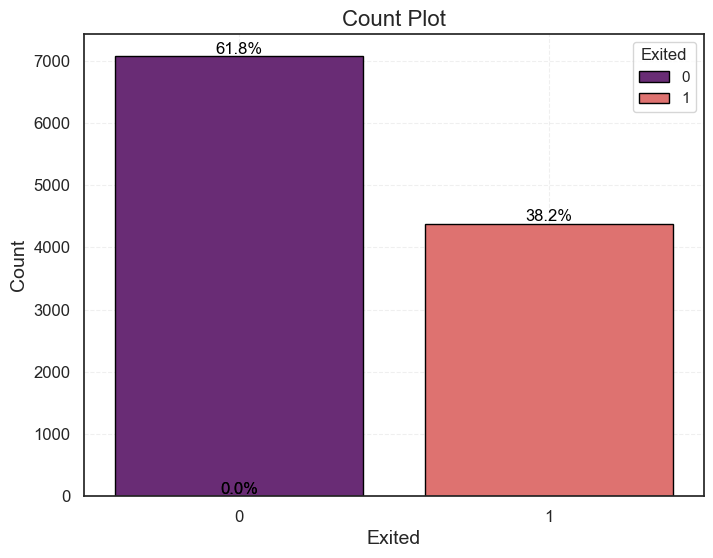

,count
name,
0,7070
1,4379


In [282]:
check_balance_classification(df,column_plot='Exited')

# Get X , Y (TVT)

In [283]:
x_train, y_train, x_valid, y_valid, x_test, y_test = get_x_y_TVT(df, target='Exited')

In [284]:
get_x_y_TVT_shape(x_train, y_train, x_valid, y_valid, x_test, y_test)

x_train shape = (8059, 11)
x_valid shape = (1100, 11)
x_test shape = (2290, 11)
y_train shape = (8059,)
y_valid shape = (1100,)
y_test shape = (2290,)


# Get train, valid and test data in same time

In [285]:
# df.columns.tolist()
# x_train , y_train ,x_valid , y_valid , x_test , y_test = train_valid_test_split(df , target='Churn Value',train_size=0.7,valid_size=0.1,test_size=0.2,random_state=42)
# get_x_y_TVT_shape(x_train, y_train, x_valid, y_valid , x_test, y_test)

# Scaling

In [286]:
x_train, x_valid, x_test = scale_data(x_train, x_valid, x_test)

# Feature Selection

In [287]:
print(len(df.columns))

12


In [288]:
x_train, x_test, x_valid, FS_model = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, x_valid=x_valid, method='SelectKBest', stat_method='f_classif', k=10)
selected_mask = FS_model.get_support()

x_column_name = x
x = FS_model.transform(x)

# Get selected and dropped columns
selected_columns = x_column_name.columns[selected_mask]
dropped_columns = x_column_name.columns[~selected_mask]

# Dimensionality Reduction

In [289]:
# print(len(df.columns))

In [290]:
# x_train, x_test, x_valid, DR_model = dimensionality_reduction(x_train=x_train, x_test=x_test, x_valid=x_valid, y_train=y_train, method= 'LDA', n_components=20)
# x = DR_model.transform(x)

# Train

In [291]:
models_names = ['XGBoost', 'RandomForest', 'SVM', 'Stacking']
models_values = []

## XGBoost_model

In [292]:
type_cross_valid = get_cross_validator(cv_type='StratifiedKFold', cv=5)

In [293]:
best_params, best_score, best_estimator = grid_search_classifier('XGBoost', x_train, y_train, cv=type_cross_valid, scoring='accuracy')

print('best_params =',best_params)
print('best_params =',best_score)

best_params = {'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100}
best_params = 0.8601552139216583


In [294]:
XGBoost_model = best_estimator
XGBoost_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

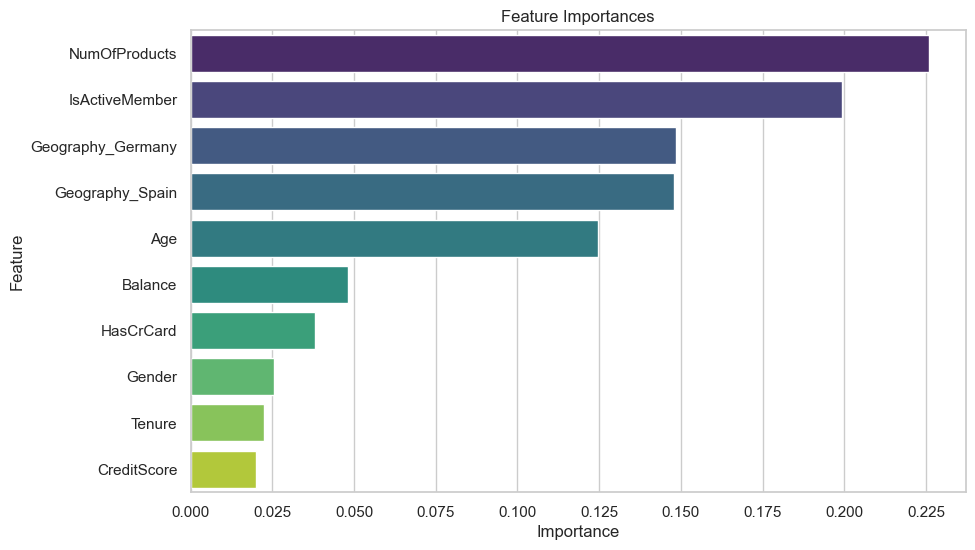

In [295]:
plot_feature_importance(XGBoost_model, x_train, selected_columns)

### Check Overfitting

Accuracy:
Training Accuracy: 0.8969
Validation Accuracy: 0.8664

Precision:
Training Precision: 0.8974
Validation Precision: 0.8661

Recall:
Training Recall: 0.8969
Validation Recall: 0.8664

F1-Score:
Training F1-Score: 0.8957
Validation F1-Score: 0.8652

MCC:
Training MCC: 0.7801
Validation MCC: 0.7176

Balanced Accuracy:
Training Balanced Accuracy: 0.8814
Validation Balanced Accuracy: 0.8525

Confusion Matrix:
Validation Confusion Matrix:
[[612  55]
 [ 92 341]]

Cross-Validation(CV):
Cross-Validation Scores: [0.85982533 0.85065502 0.8558952  0.86593886 0.86063783]
Cross-Validation Mean Score: 0.8586


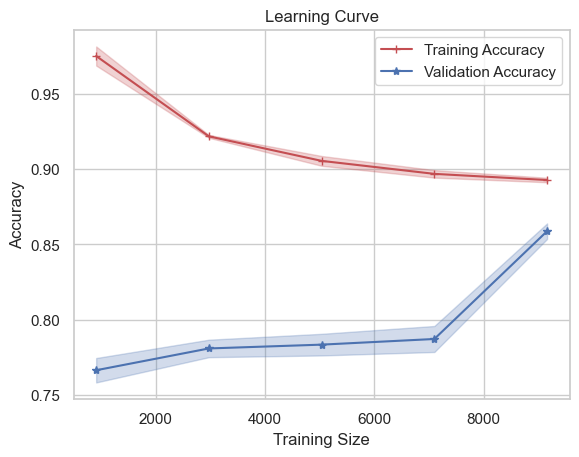

ROC AUC: 0.9295


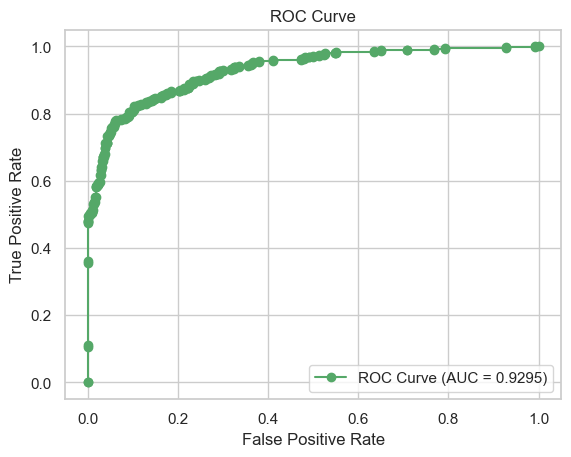

In [296]:
Check_Overfitting_Classification(XGBoost_model,x,y,x_train,y_train,x_valid,y_valid)

### Get y_predict

In [297]:
y_pred = XGBoost_model.predict(x_test)

### Evaluate model

#### Confusion Matrix

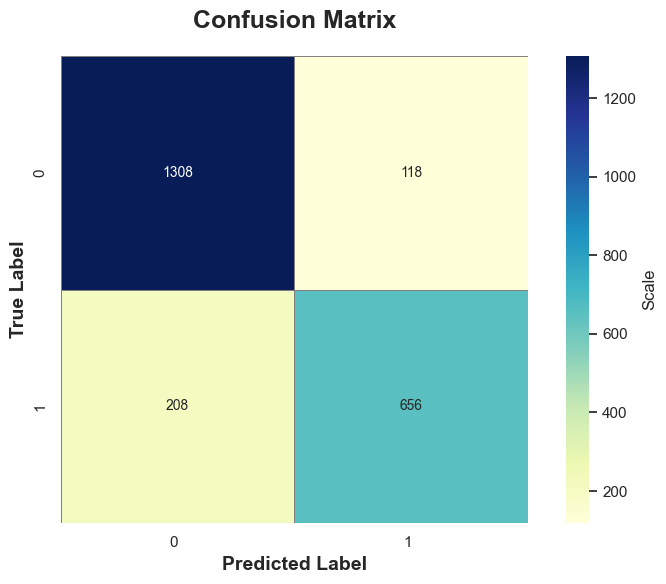

In [298]:
plot_confusion_matrix(y_test, y_pred)

#### accuracy,recall,precision,f1 and roc_auc

Accuracy score = 0.8576
Recall score = 0.7593
Precision score = 0.8475
F1 score = 0.8010
ROC AUC score = 0.8383

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1426
           1       0.85      0.76      0.80       864

    accuracy                           0.86      2290
   macro avg       0.86      0.84      0.85      2290
weighted avg       0.86      0.86      0.86      2290




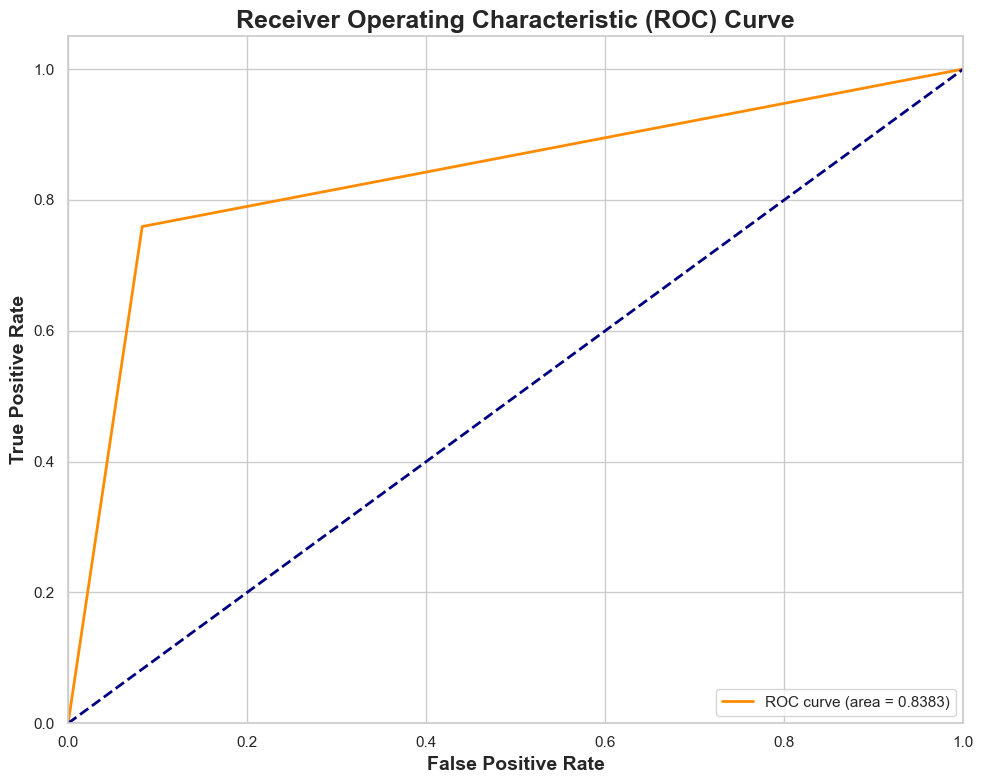

In [299]:
accuracy, recall, precision, f1, roc_auc = evaluate_model_Classification(y_test, y_pred)
models_values.append([accuracy, recall, precision, f1, roc_auc])

## RandomForest_model

In [300]:
type_cross_valid = get_cross_validator(cv_type='StratifiedKFold', cv=5)

In [301]:
best_params, best_score, best_estimator = grid_search_classifier('RandomForest', x_train, y_train, cv=type_cross_valid, scoring='precision')

print('best_params =',best_params)
print('best_params =',best_score)

best_params = {'max_depth': 10, 'n_estimators': 300}
best_params = 0.8603654337966381


In [302]:
RandomForest_model = best_estimator
RandomForest_model

RandomForestClassifier(max_depth=10, n_estimators=300, n_jobs=-1)

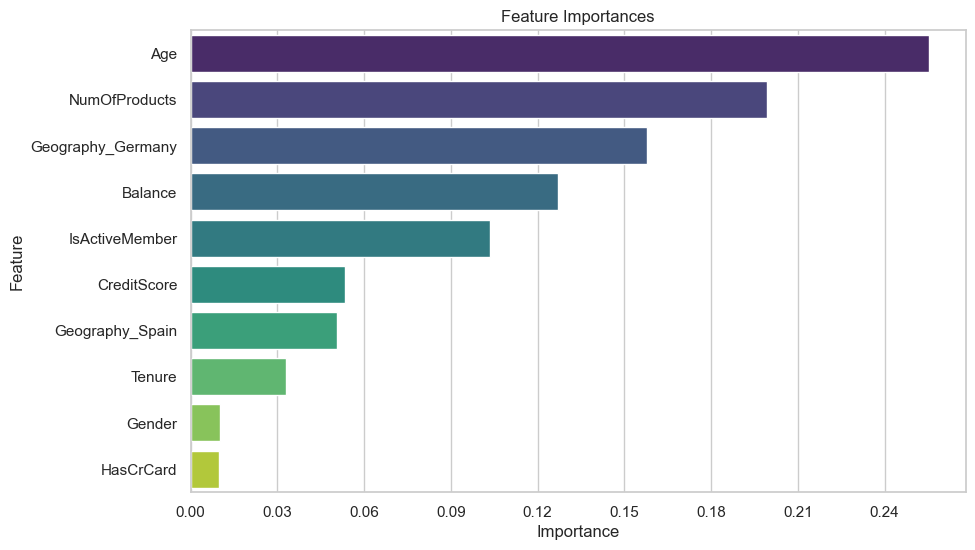

In [303]:
plot_feature_importance(RandomForest_model, x_train, selected_columns)

### Check Overfitting

Accuracy:
Training Accuracy: 0.8830
Validation Accuracy: 0.8564

Precision:
Training Precision: 0.8849
Validation Precision: 0.8570

Recall:
Training Recall: 0.8830
Validation Recall: 0.8564

F1-Score:
Training F1-Score: 0.8809
Validation F1-Score: 0.8543

MCC:
Training MCC: 0.7508
Validation MCC: 0.6963

Balanced Accuracy:
Training Balanced Accuracy: 0.8622
Validation Balanced Accuracy: 0.8382

Confusion Matrix:
Validation Confusion Matrix:
[[616  51]
 [107 326]]

Cross-Validation(CV):
Cross-Validation Scores: [0.85414847 0.8510917  0.85283843 0.86331878 0.85408475]
Cross-Validation Mean Score: 0.8551


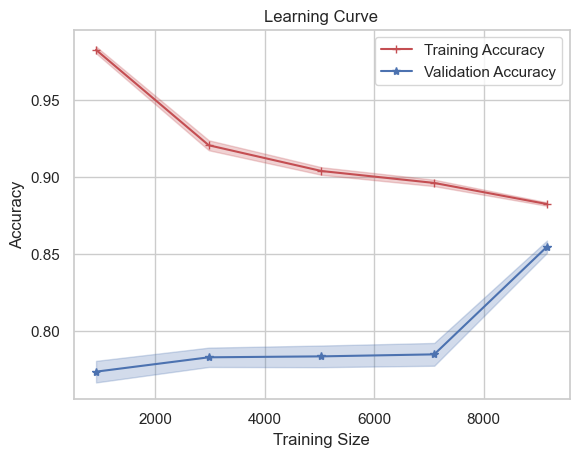

ROC AUC: 0.9225


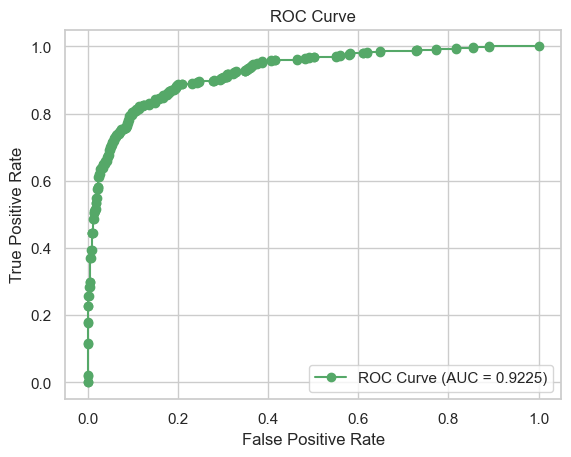

In [304]:
Check_Overfitting_Classification(RandomForest_model,x,y,x_train,y_train,x_valid,y_valid)

### Get y_predict

In [305]:
y_pred = RandomForest_model.predict(x_test)

### Evaluate model

#### Confusion Matrix

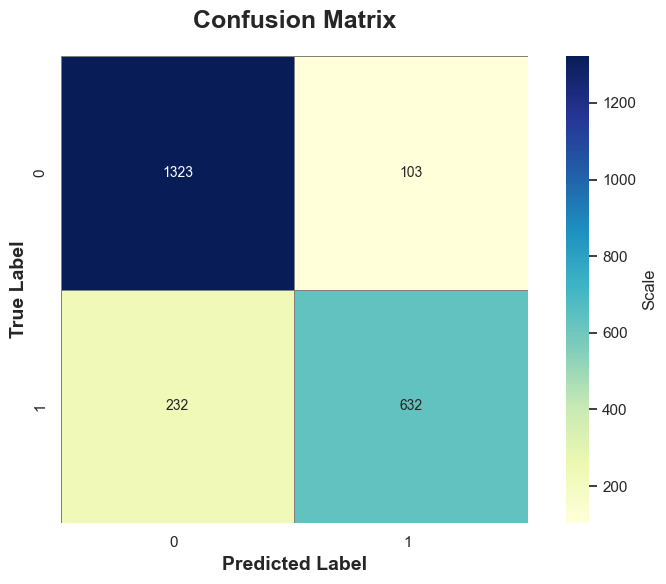

In [306]:
plot_confusion_matrix(y_test, y_pred)

#### accuracy,recall,precision,f1 and roc_auc

Accuracy score = 0.8537
Recall score = 0.7315
Precision score = 0.8599
F1 score = 0.7905
ROC AUC score = 0.8296

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1426
           1       0.86      0.73      0.79       864

    accuracy                           0.85      2290
   macro avg       0.86      0.83      0.84      2290
weighted avg       0.85      0.85      0.85      2290




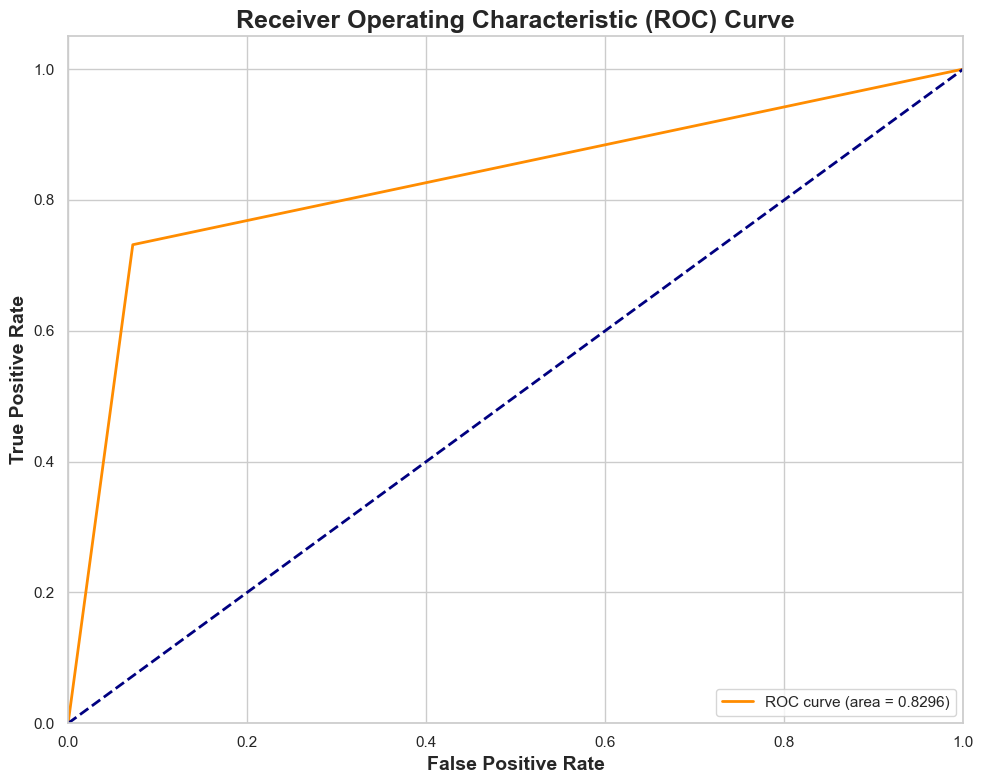

In [307]:
accuracy, recall, precision, f1, roc_auc = evaluate_model_Classification(y_test, y_pred)
models_values.append([accuracy, recall, precision, f1, roc_auc])

## SVM_model

In [308]:
type_cross_valid = get_cross_validator(cv_type='StratifiedKFold', cv=5)

In [309]:
best_params, best_score, best_estimator = grid_search_classifier('SVM', x_train, y_train, cv=type_cross_valid, scoring='precision')

print('best_params =',best_params)
print('best_params =',best_score)

best_params = {'C': 1, 'kernel': 'rbf'}
best_params = 0.8262415585808668


In [310]:
SVM_model = best_estimator
SVM_model

SVC(C=1)

In [311]:
plot_feature_importance(SVM_model, x_train, selected_columns)

Model does not have feature importances or coefficients.


### Check Overfitting

Accuracy:
Training Accuracy: 0.8455
Validation Accuracy: 0.8391

Precision:
Training Precision: 0.8455
Validation Precision: 0.8387

Recall:
Training Recall: 0.8455
Validation Recall: 0.8391

F1-Score:
Training F1-Score: 0.8430
Validation F1-Score: 0.8371

MCC:
Training MCC: 0.6685
Validation MCC: 0.6591

Balanced Accuracy:
Training Balanced Accuracy: 0.8235
Validation Balanced Accuracy: 0.8215

Confusion Matrix:
Validation Confusion Matrix:
[[603  64]
 [113 320]]

Cross-Validation(CV):
Cross-Validation Scores: [0.63187773 0.61441048 0.62139738 0.63449782 0.62778506]
Cross-Validation Mean Score: 0.6260


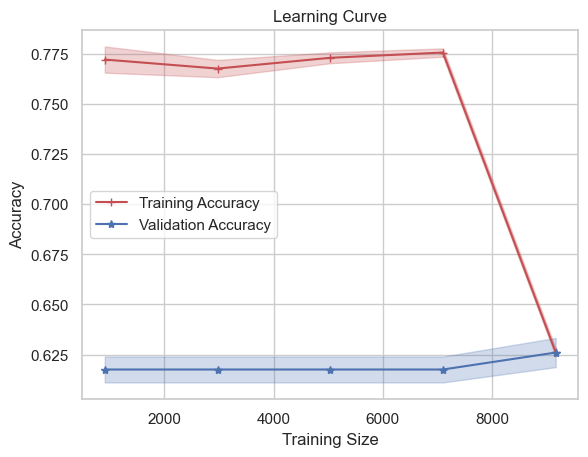

ROC AUC: Not available for this model


In [312]:
Check_Overfitting_Classification(SVM_model,x,y,x_train,y_train,x_valid,y_valid)

### Get y_predict

In [313]:
y_pred = SVM_model.predict(x_test)

### Evaluate model

#### Confusion Matrix

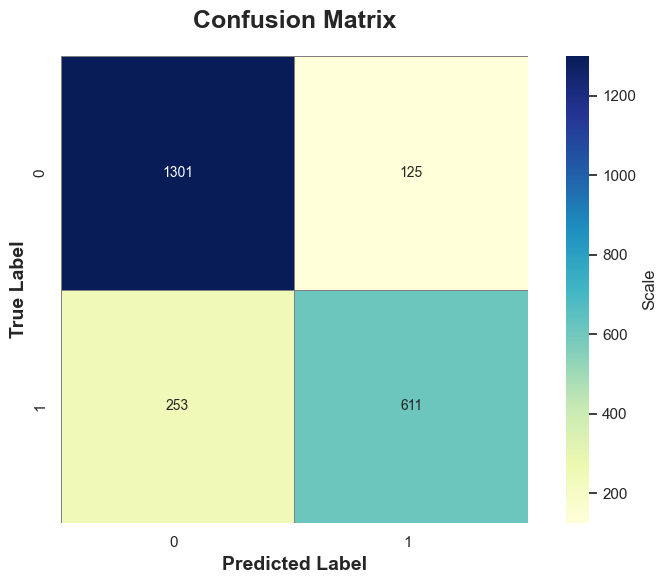

In [314]:
plot_confusion_matrix(y_test, y_pred)

#### accuracy,recall,precision,f1 and roc_auc

Accuracy score = 0.8349
Recall score = 0.7072
Precision score = 0.8302
F1 score = 0.7638
ROC AUC score = 0.8098

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1426
           1       0.83      0.71      0.76       864

    accuracy                           0.83      2290
   macro avg       0.83      0.81      0.82      2290
weighted avg       0.83      0.83      0.83      2290




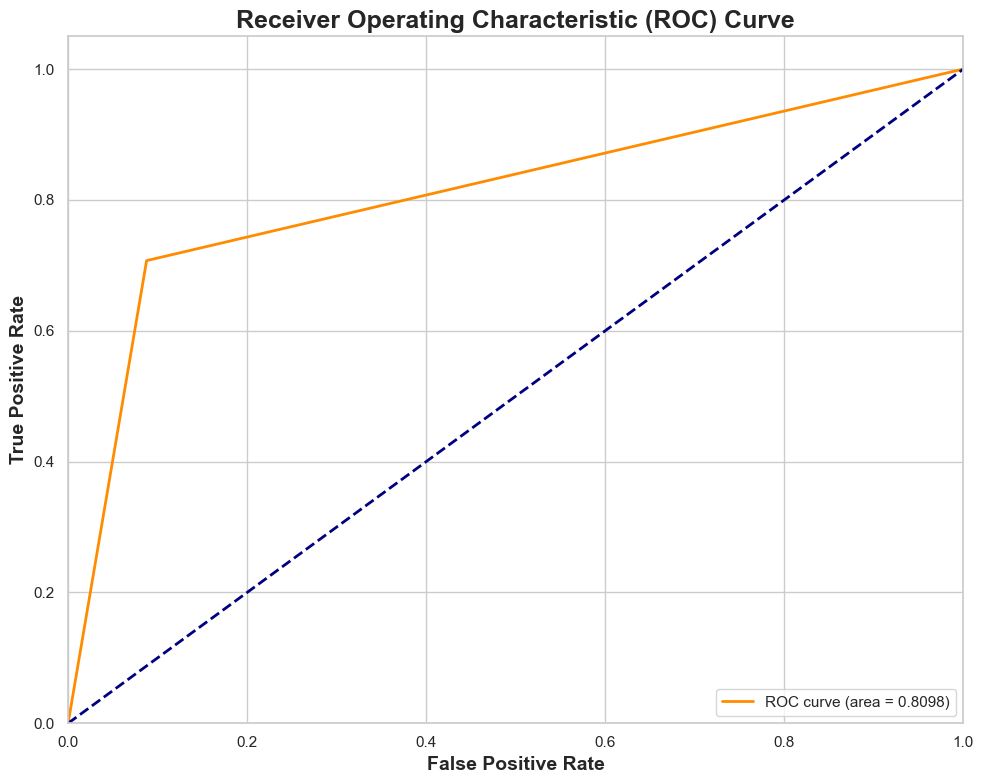

In [315]:
accuracy, recall, precision, f1, roc_auc = evaluate_model_Classification(y_test, y_pred)
models_values.append([accuracy, recall, precision, f1, roc_auc])

## Stacking_model

In [316]:
type_cross_valid = get_cross_validator(cv_type='StratifiedKFold', cv=5)

In [317]:
xgboost = XGBClassifier(gamma= 0.1, learning_rate= 0.2, max_depth= 5, min_child_weight= 3, n_estimators= 100)
random_forest = RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=-1)
svc = SVC(C=1, kernel='rbf')

final_estimator= LogisticRegression()

voting_classifier =[('xgb', xgboost),('rf', random_forest),('svc', svc)]

Stacking_model = StackingClassifier(estimators=voting_classifier, cv=type_cross_valid, final_estimator=LogisticRegression())
Stacking_model.fit(x_train, y_train)

StackingClassifier(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=0.1,
                                              grow_policy=None,...
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=3, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('rf',
                                RandomForestClassifier(max_depth=10,
                                                       n_estimators=200,
                                                       n_jobs=-1)),
                               ('svc', SVC(C=1))],
                   final_estimator=LogisticRegression())

In [318]:
plot_feature_importance(Stacking_model, x_train, selected_columns, top_n='first')

Model does not have feature importances or coefficients.


In [319]:
plot_feature_importance(Stacking_model, x_train, selected_columns, top_n='last')

Model does not have feature importances or coefficients.


### Check Overfitting

Accuracy:
Training Accuracy: 0.8945
Validation Accuracy: 0.8709

Precision:
Training Precision: 0.8950
Validation Precision: 0.8709

Recall:
Training Recall: 0.8945
Validation Recall: 0.8709

F1-Score:
Training F1-Score: 0.8933
Validation F1-Score: 0.8697

MCC:
Training MCC: 0.7750
Validation MCC: 0.7273

Balanced Accuracy:
Training Balanced Accuracy: 0.8787
Validation Balanced Accuracy: 0.8567

Confusion Matrix:
Validation Confusion Matrix:
[[616  51]
 [ 91 342]]

Cross-Validation(CV):
Cross-Validation Scores: [0.86157205 0.85676856 0.85851528 0.86244541 0.86063783]
Cross-Validation Mean Score: 0.8600


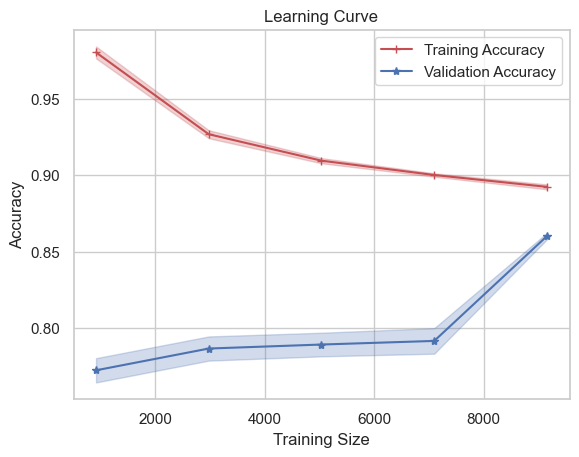

ROC AUC: 0.9291


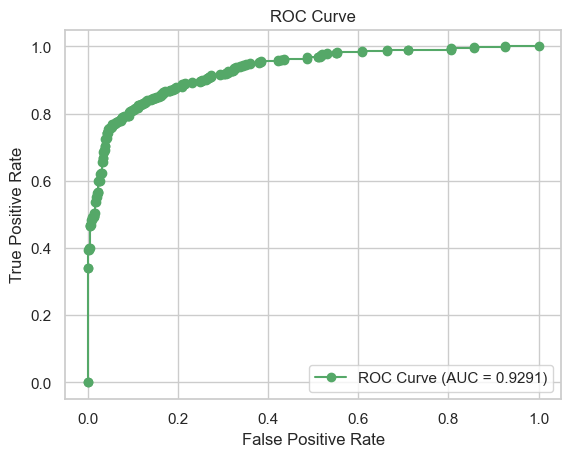

In [320]:
Check_Overfitting_Classification(Stacking_model,x,y,x_train,y_train,x_valid,y_valid)

### Get y_predict

In [321]:
y_pred = Stacking_model.predict(x_test)

### Evaluate model

#### Confusion Matrix

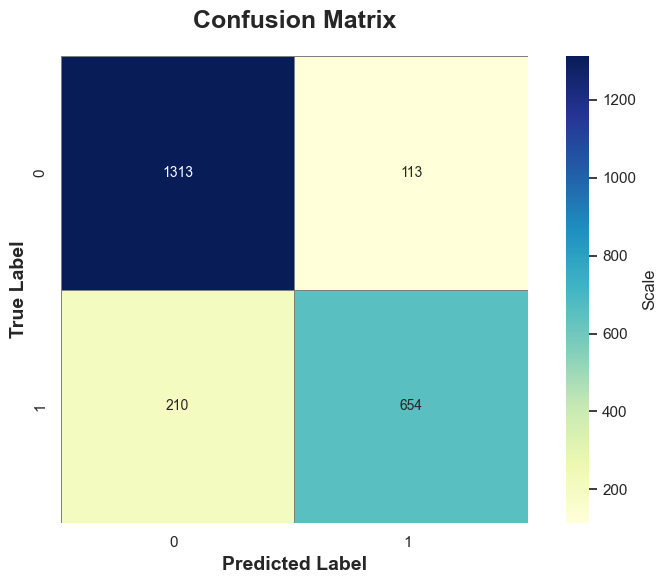

In [322]:
plot_confusion_matrix(y_test, y_pred)

#### accuracy,recall,precision,f1 and roc_auc

Accuracy score = 0.8590
Recall score = 0.7569
Precision score = 0.8527
F1 score = 0.8020
ROC AUC score = 0.8389

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1426
           1       0.85      0.76      0.80       864

    accuracy                           0.86      2290
   macro avg       0.86      0.84      0.85      2290
weighted avg       0.86      0.86      0.86      2290




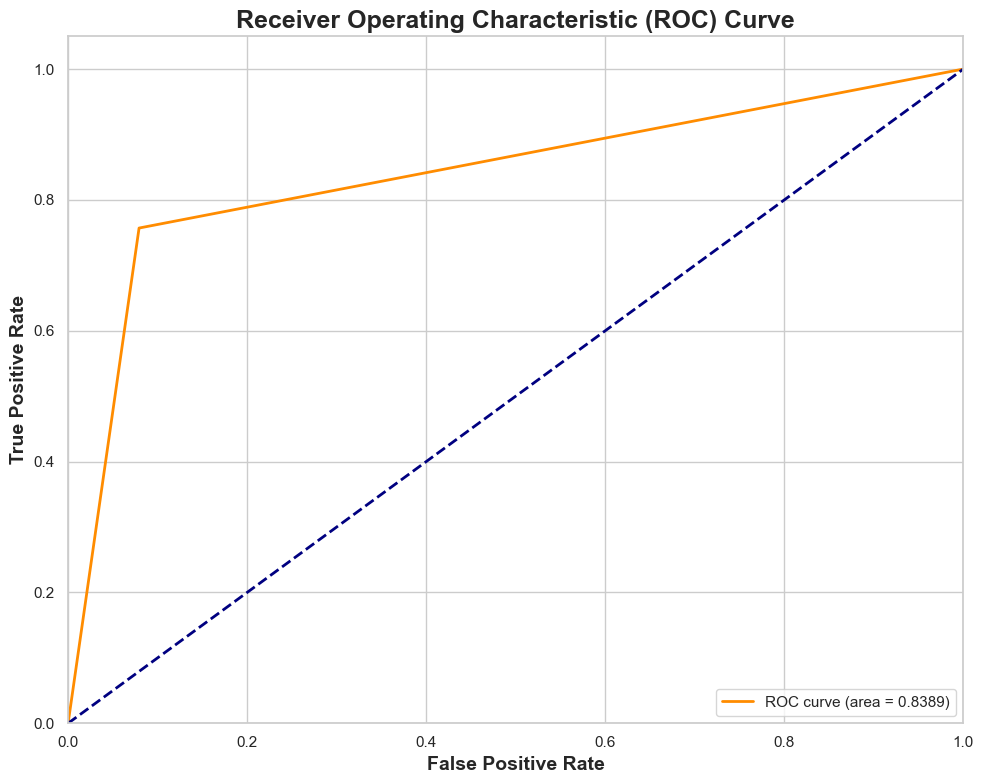

In [323]:
accuracy, recall, precision, f1, roc_auc = evaluate_model_Classification(y_test, y_pred)
models_values.append([accuracy, recall, precision, f1, roc_auc])

# compare between the models

In [324]:
models_names
models_values
evaluate_names = ['accuracy', 'recall', 'precision', 'f1', 'roc_auc']

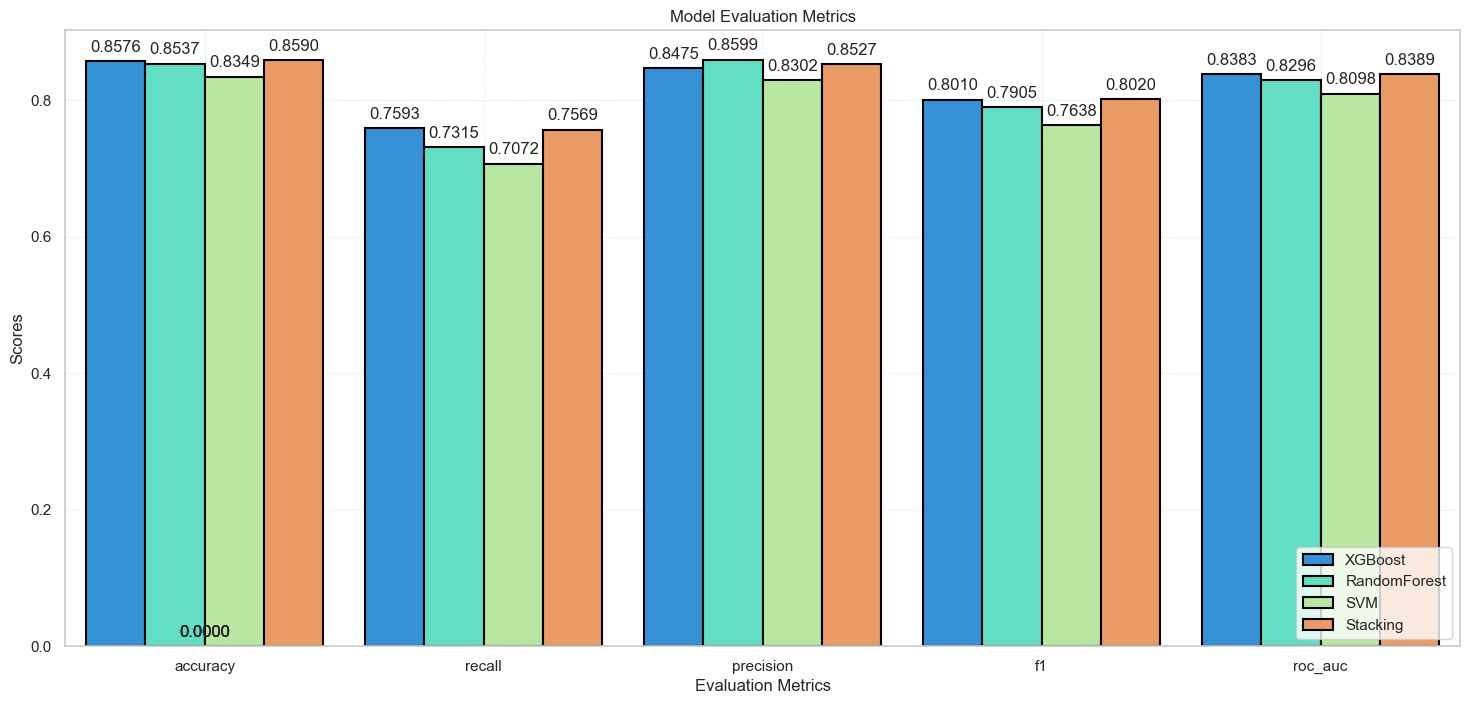

In [325]:
multiple_bar_plots_seaborn(
    data=models_values, 
    labels=models_names, 
    categories=evaluate_names, 
    palette='rainbow',
    title='Model Evaluation Metrics',
    xlabel='Evaluation Metrics',
    ylabel='Scores',
    figsize=(18, 8),
    width=0.85,
    hatch = False,
    annote_num = 4
)